In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.     #sta divisione fa miracoli, perchè? (sono i pixel)

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


### Initialize all parameters!

Our NN will have a simple two-layer architecture. Input layer  𝑎[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image.

A hidden layer  𝑎[1] will have 10 units with ReLU activation, and finally our output layer  𝑎[2] will have 10 units corresponding to the ten digit classes with softmax activation.

### Theory
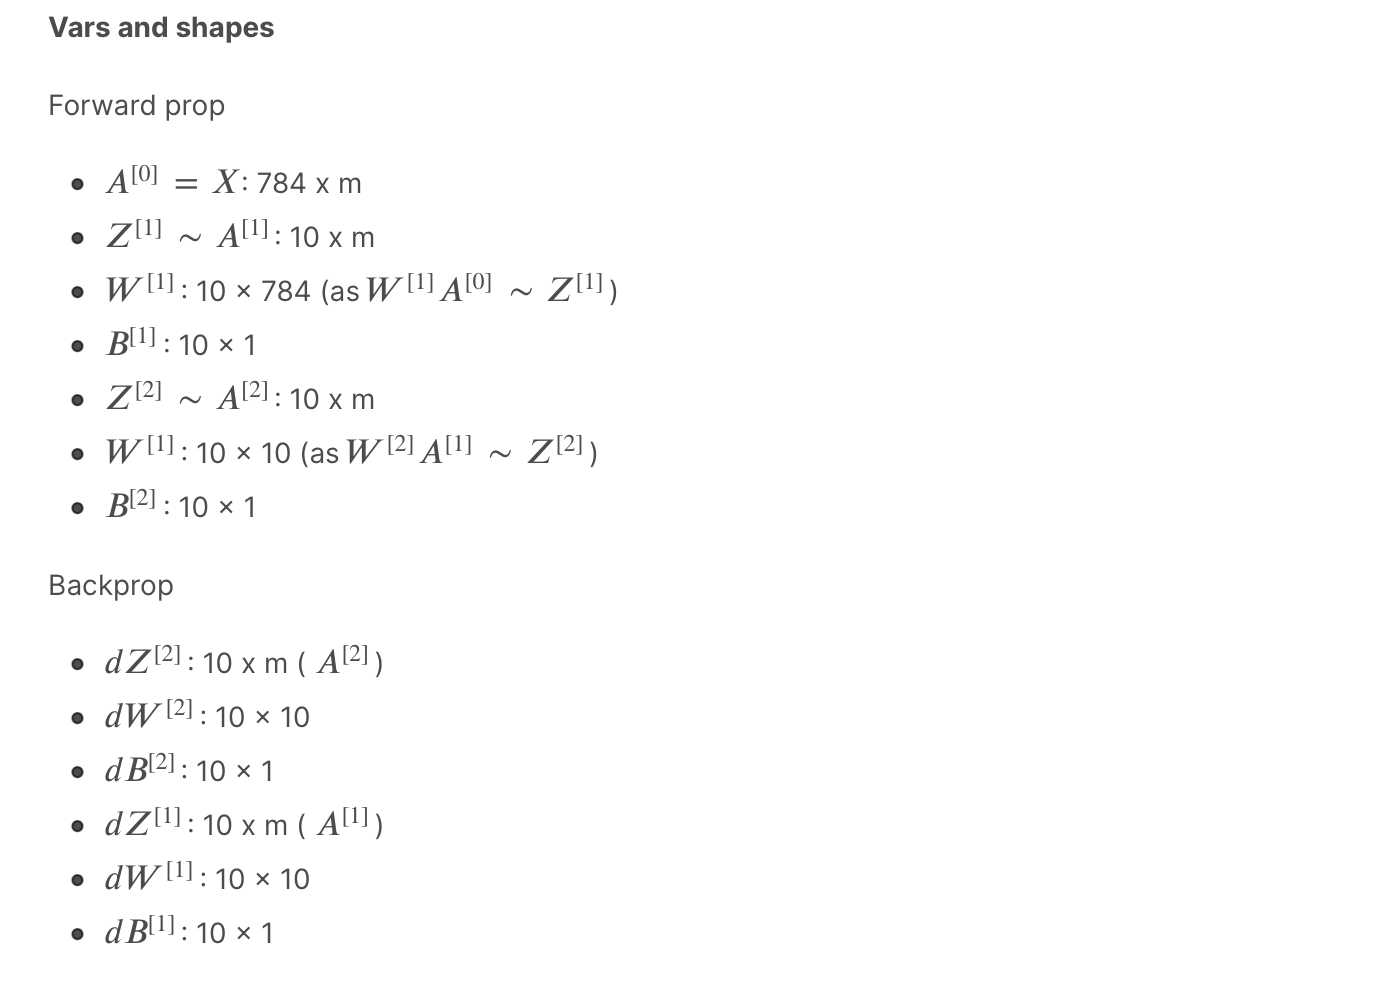

In [5]:
#Let's initialize all of our parameters
#Let's start with W1, b1, W2, b2


def init_params():
    W1 = np.random.rand(10, 784) - 0.5          #generate random values between -0.5 and +0.5 for each element
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))               #preserves the amount of clomuns and collapse the amount of rows to one
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):                                #la derivata è 0 fino a x=0 e 1 dopo. Se Z è > 0 return = True e True = 1, che è il valore della derivata
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))   #creates the correctly sized matrix
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.06, 1000)

Iteration:  0
[2 2 6 ... 2 2 6] [4 9 8 ... 7 7 8]
0.10458536585365853
Iteration:  50
[4 0 7 ... 7 2 1] [4 9 8 ... 7 7 8]
0.3051219512195122
Iteration:  100
[6 2 1 ... 7 2 1] [4 9 8 ... 7 7 8]
0.40151219512195124
Iteration:  150
[4 4 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.5081707317073171
Iteration:  200
[4 4 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.6064146341463414
Iteration:  250
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.6718780487804878
Iteration:  300
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.7116341463414634
Iteration:  350
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.7356341463414634
Iteration:  400
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.7545609756097561
Iteration:  450
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.7690243902439025
Iteration:  500
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.7806829268292683
Iteration:  550
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.790609756097561
Iteration:  600
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.7994634146341464
Iteration:  650
[4 9 8 ... 7 7 8] [4 9 8 ... 7 7 8]
0.8091219512195122
Iteratio

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


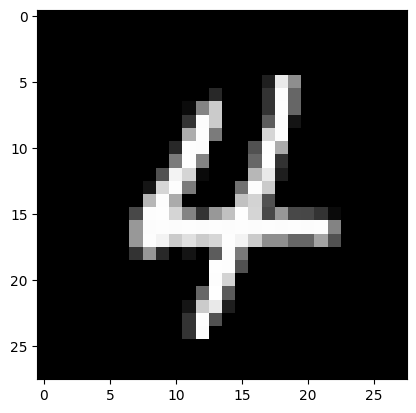

Prediction:  [9]
Label:  9


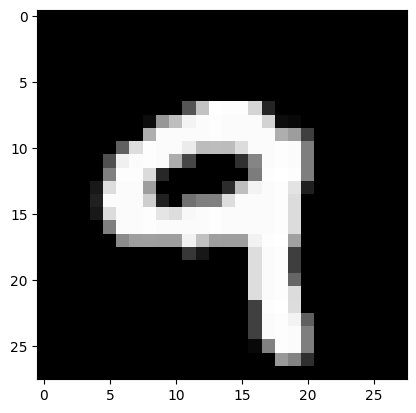

Prediction:  [8]
Label:  8


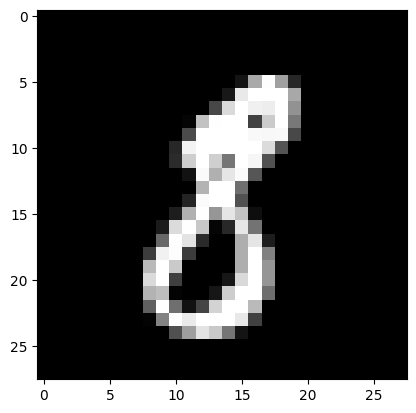

Prediction:  [9]
Label:  9


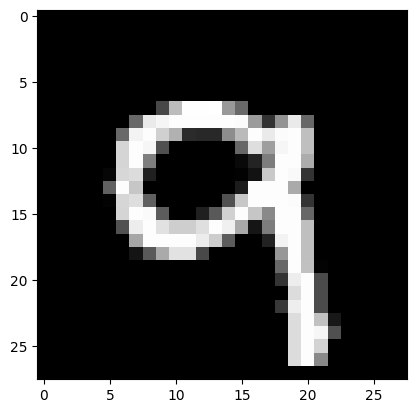

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 3 9 8 3 4 0 4 7 1 1 0 9 7 2 1 2 1 8 2 2 4 5 9 4 1 6 8 9 3 9 2 8 5 1 7 7
 8 0 4 4 3 4 8 0 4 6 3 4 4 8 9 0 9 6 8 9 8 1 8 7 1 3 5 2 7 2 0 6 8 8 2 6 7
 3 0 5 1 1 2 6 5 4 2 3 2 9 1 2 6 6 0 8 8 3 7 0 4 4 8 6 2 2 1 7 3 8 6 9 5 0
 4 0 8 1 7 6 2 7 3 3 3 3 8 6 7 9 7 8 0 7 3 1 2 1 1 4 6 2 8 3 4 0 8 8 3 6 3
 7 7 1 7 8 7 1 1 9 7 8 4 3 4 1 6 3 9 4 7 6 9 7 0 9 6 7 8 7 2 2 3 9 1 3 0 3
 7 9 8 7 5 3 1 8 3 6 8 9 7 7 2 5 7 7 8 6 5 4 4 0 7 6 6 6 0 6 3 7 1 9 2 4 9
 2 1 1 7 6 5 9 4 2 8 6 2 6 3 2 2 0 5 2 7 7 4 2 1 3 9 0 8 1 0 2 4 4 5 6 2 6
 3 9 8 2 3 2 1 0 3 8 9 5 6 5 3 8 2 6 2 0 6 4 8 9 9 4 4 1 0 2 8 2 3 8 8 9 2
 3 1 7 6 5 5 6 6 9 6 8 7 5 4 8 9 9 4 1 7 6 6 5 0 0 9 8 7 3 6 3 8 6 4 0 9 1
 5 2 5 7 6 0 6 1 0 2 8 6 9 2 3 1 1 1 4 4 9 6 3 4 5 9 4 6 7 5 6 9 1 6 6 4 8
 1 9 5 3 4 4 4 8 5 8 7 4 0 7 9 7 7 1 6 6 5 4 1 2 4 3 0 0 0 4 4 3 7 7 4 7 1
 6 0 9 6 8 2 4 4 7 4 7 9 3 8 4 4 0 5 3 5 7 6 3 6 8 1 8 6 3 9 4 8 8 1 2 5 4
 3 4 4 6 8 7 6 4 6 9 6 5 1 1 6 6 3 1 8 3 2 4 1 2 3 2 1 9 5 9 7 1 2 2 0 4 3
 2 9 6 6 5 1 4 6 6 7 9 6 

0.841